7.2 EJERCICIO MODULO 3 VISUALIZACIONES

## Ejercicios

Utilizando el conjunto de datos que terminamos de limpiar ayer, contesta a las siguientes preguntas utilizando la visualización más apropiada. 

1.  ¿Qué porcentaje de productos tiene el distintivo "Producto local"?

2. ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".

3. ¿Cuál es la relación entre el precio de envío y las unidades vendidas? (Este le tenemos repetido, está resuelto en visualizacion I)

4. ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.

5. ¿Cómo varía el precio promedio de los productos por país de origen?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("merchant_fill_nonulls.csv", index_col = 0)
df.head(2)

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0


In [5]:
# 1. ¿Qué porcentaje de productos tiene el distintivo "Producto local"?

# preparamos los datos. 
df_local = df["badge_local_product"].value_counts().reset_index()

# otra opcion sería con df_local = df.groupby('badge_local_product)['product_id].count().reset_index()
df_local

,badge_local_product,count
0,No,1544
1,Si,29


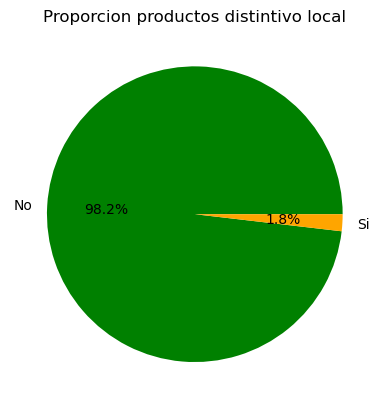

In [ ]:
# pide proporcion y tenemos pocos grupos, el gráfico ideal es un pie. Recordar que este solo lo podemos hacer con matplotlib
plt.pie( df_local["count"], 
        labels = df_local["badge_local_product"], 
        autopct = "%1.1f%%", 
        colors = ["green", "orange"])
plt.title('Proporcion productos distintivo local');

# el porcentaje de productos con distintivo local es 1.8%

In [7]:
# 2.  ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".
df_calidad = df["badge_product_quality"].value_counts().reset_index()

# otra opcion: df_calidad = df_calidad.groupby('badge_product_quality)['product_id].count().reset_index()

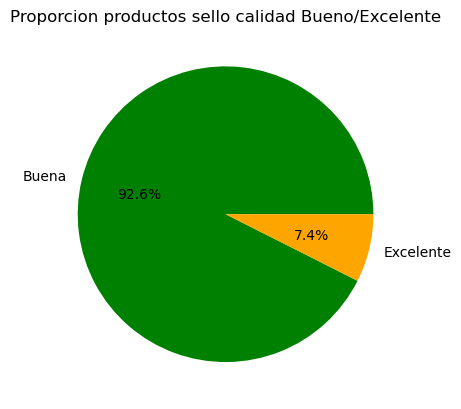

In [10]:
plt.pie( df_calidad["count"], 
        labels = df_calidad["badge_product_quality"], 
        autopct = "%1.1f%%", 
        colors = ["green", "orange"])
plt.title('Proporcion productos sello calidad Bueno/Excelente');
# el porcentaje de productos con buena calidad producto es de 92.6%

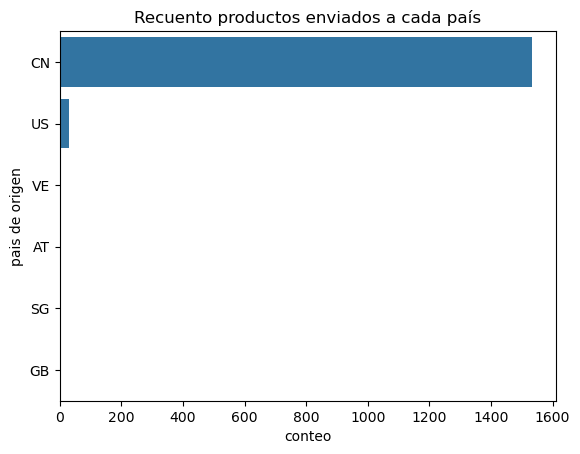

In [ ]:
# 4. ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.

sns.countplot(y = "origin_country", data = df) # como nos pide las barras horizontales ponemos las categorías en el eje y
plt.ylabel("pais de origen")
plt.xlabel("conteo")
plt.title('Recuento productos enviados a cada país');

In [ ]:
# acordaros que el countplot no existe en matplotlib, tenemos que preparar el gráfico. 

df_paises = df.groupby('origin_country')['product_id'].count().reset_index()
df_paises

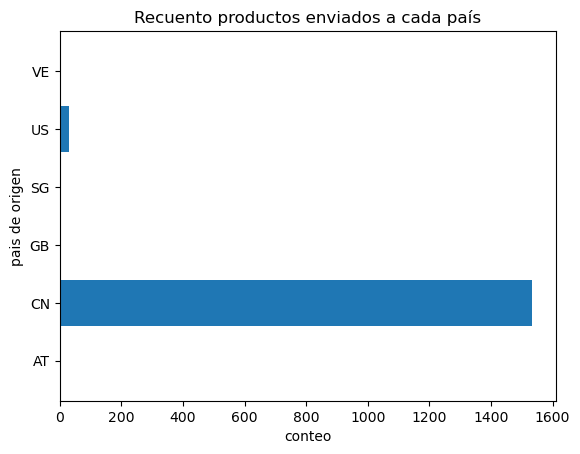

In [25]:
plt.barh(data = df_paises, width= 'product_id', y = 'origin_country')
# con plt.barh hacemos barras horizontales en lugar de verticales
# pero en este caso cambiamos y ponemos la categorica en y y la numerica en width

plt.ylabel("pais de origen")
plt.xlabel("conteo")
plt.title('Recuento productos enviados a cada país');

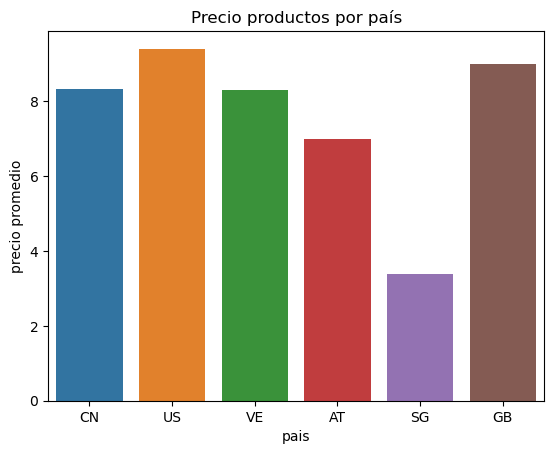

In [38]:
# 5. ¿Cómo varía el precio promedio de los productos por país de origen? Muestra un gráfico de barras.

# Literalmente nos pide el promedio de una variable numérica para las diferentes categorías (países) --> BARPLOT
# con seaborn nos calcula directamente el promedio, en matplotlib se lo tenemos que dar calculado


sns.barplot(x = "origin_country", y = "price", data = df, hue='origin_country', errorbar=None)
plt.ylabel("precio promedio")
plt.xlabel("pais")
plt.title('Precio productos por país');

In [ ]:
# preparamos dataframe para poder hacer el barplot en matplotlib y pasar el order en seaborn. 
df_paises = df.groupby("origin_country")["price"].mean().reset_index().sort_values(by = "price", ascending = False)
df_paises

,origin_country,price
4,US,9.397097
2,GB,9.000000
1,CN,8.310665
5,VE,8.298000
0,AT,7.000000
3,SG,3.380000


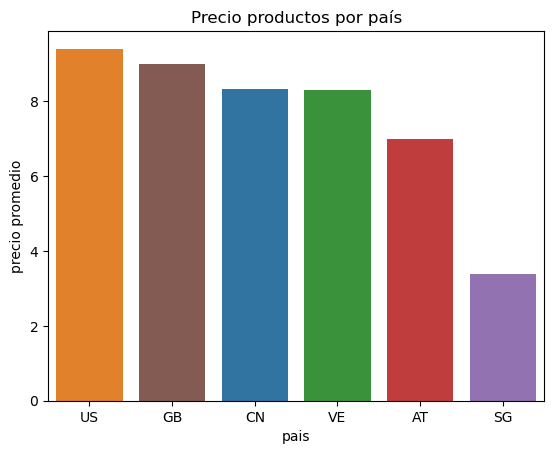

In [ ]:
# ordenado

sns.barplot(x = "origin_country", y = "price", data = df, hue='origin_country', errorbar=None, order=df_paises['origin_country'])
plt.ylabel("precio promedio")
plt.xlabel("pais")
plt.title('Precio productos por país');

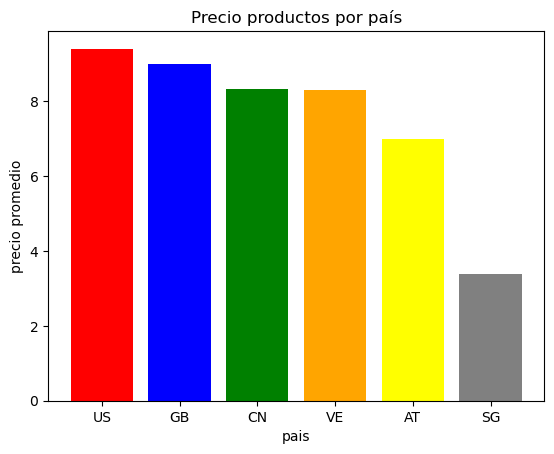

In [46]:
# en matplotlib usamos el dataframe preparado df_paises
plt.bar(x = "origin_country", height= "price", data = df_paises, color=['red', 'blue', 'green', 'orange', 'yellow', 'grey'])
plt.ylabel("precio promedio")
plt.xlabel("pais")
plt.title('Precio productos por país');